### Image processing 

### Computational Photography

### Feature detection and description
We are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared. If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what they are. If someone asks you to point out one good feature which can be compared across several images, you canpoint out one. We search for these features in an image, find them, look for the same features in other images and align them.

Looking for the regions in images which have maximum variation when moved by a small amount in all regions around it.

**Harris Corner Detection**

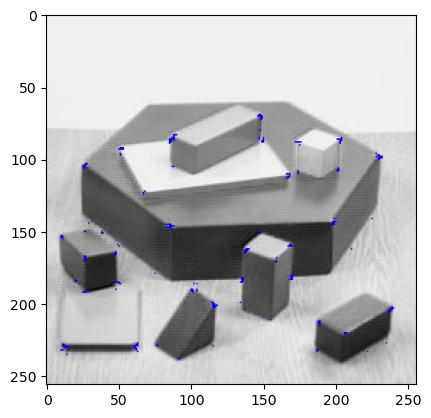

In [31]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
filename = 'data/box.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,blockSize=2,ksize=3,k=0.04)
#result is dilated for marking the corners
kernel = np.ones(shape=(1,1), dtype=np.uint8)
dst = cv.dilate(dst, kernel=kernel)
#threshold for an optimal value
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)
plt.show()

**Corner with SubPixel Accuracy**

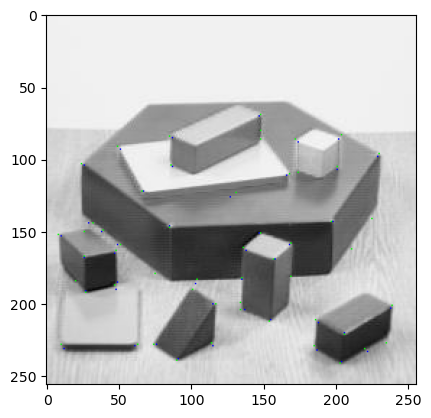

In [32]:
import numpy as np
import cv2 as cv
filename = 'data/box.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,blockSize=2,ksize=3,k=0.04)
dst = cv.dilate(dst, None)
rest, dst = cv.threshold(dst,thresh=0.01*dst.max(),maxval=255,type=0)
dst = np.uint8(dst)
#find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
#define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray, corners=np.float32(centroids),winSize=(5,5),zeroZone=(-1,-1),criteria=criteria)
#Now draw them
res = np.hstack((centroids,corners))
res = np.int8(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imshow('dst', img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

**Shi-Tomasi Corner Detector**

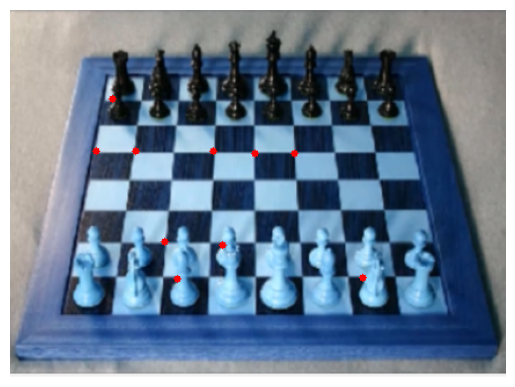

In [23]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('data/chessboard3.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = cv.goodFeaturesToTrack(gray, maxCorners=10, qualityLevel=0.01, minDistance=10)
corners = np.int32(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,center=(x,y),radius=3,color=255,thickness=-1)
plt.imshow(img)
plt.axis('off')
plt.show()

**SIFT**(Scale-Invariant Feature Transform)

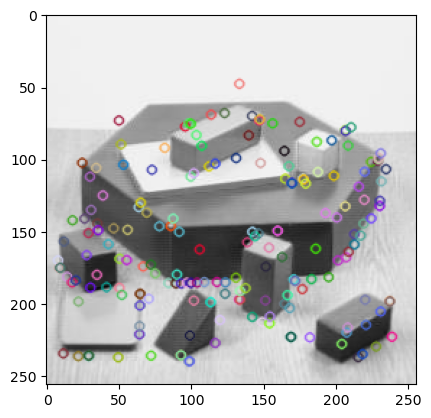

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('data/box.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,mask=None)
img = cv.drawKeypoints(gray,kp,outImage=img)
plt.imshow(img)
plt.show()

**SURF**(Speeded-Up Robust Features)

In [26]:
import cv2 as cv
img = cv.imread('data/fly.jpg', cv.IMREAD_GRAYSCALE)
surf = cv.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img, None)
len(kp)
print(surf.getHessianThreshold())
surf.setHessianThreshold(50000)
kp, des = surf.detectAndCompute(img,None)
print(len(kp))
img2 = cv.drawKeypoints(img, keypoints=kp, outImage=None, color=(255,0,0), flags=4)
plt.imshow(img2)
plt.show()
print(surf.getUpright())
surf.setUpright(True)
kp = surf.detect(img, None)
img2 = cv.drawKeypoints(img, keypoints=kp, outImage=None, color=(255,0,0), flags=4)
plt.imshow(img2)
plt.show()
print(surf.descriptorSize())
surf.getExtended()
surf.setExtended(True)
kp, des = surf.detectAndCompute(img, None)
print(surf.descriptorSize())
print(des.shape)

error: OpenCV(4.12.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


**FAST (Features from Accelerated Segment Test)**

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('data/box.jpg', cv.IMREAD_GRAYSCALE)
# initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# Print all default params
print( f"Threshold: {fast.getThreshold()}")
print( f"nonmaxSuppression:{fast.getNonmaxSuppression()}" )
print( f"neighborhood: {fast.getType()}" )
print( f"Total Keypoints with nonmaxSuppression: {len(kp)}" )
# find and draw the keypoints
kp = fast.detect(img, None)
img2 = cv.drawKeypoints(img, keypoints=kp, outImage=None, color=(255,0,0))
plt.imshow(img2)
plt.show()
# disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print(f"Total Keypoints without nonmaxSuppression: {len(k)+()}")


Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 431


**BRIEF**(Binary Robust Independent Elementary Features) 

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('data/fly.jpg', cv.IMREAD_GRAYSCALE)
 
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
 
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
 
# find the keypoints with STAR
kp = star.detect(img,None)
 
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
 
print( brief.descriptorSize() )
print( des.shape )

32
(429, 32)


**ORB**(Oriented FAST and Rotated BRIEF)

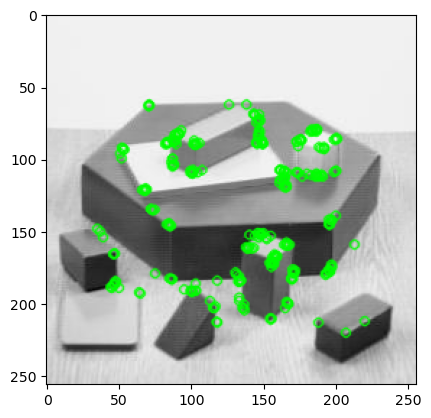

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('data/box.jpg', cv.IMREAD_GRAYSCALE)
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img, None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location, not size and orientation
img2 = cv.drawKeypoints(img, keypoints=kp, outImage=None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

**Feature Matching**

**Feature Matching + Homography to find Objects**

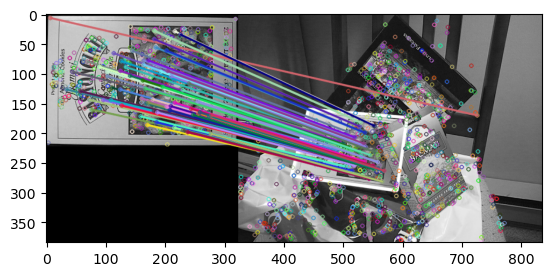

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread('data/box1.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('data/box_in_scene.png', cv.IMREAD_GRAYSCALE)
#Initiate SIFT detector
sift = cv.SIFT_create()
#find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
# store all the good matches as per Lowe's ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0], [0,h-1], [w-1,h-1], [w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts, M)
    img2 = cv.polylines(img2, pts=[np.int32(dst)], isClosed=True, color=255, thickness=3, lineType=cv.LINE_AA)
else:
    print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
    matchesMask = None
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=None,
                  matchesMask=matchesMask,
                  flags=2)
img3 = cv.drawMatches(img1=img1, keypoints1=kp1, img2=img2, keypoints2=kp2, matches1to2=good, outImg=None, matchesThickness=2)
plt.imshow(img3, 'gray')
plt.show()

### 

## Techinques in Object Detection

Traditional Computer Vision Techniques for Object Detection:
1. Haar Cascades
2. Histogram of Oriented Gradients (HOG)
3. SIFT (Scale-Invariant Feature Transform)

Deep Learning Methods for Object Detection:
- Two-Stage Detectors:
  1. R-CNN (Regions with Convolutional Neural Networks)

     This technique uses selective search algorithm to generate 2000 region proposals from an image, then the proposed region is resized and passed through pre-trained CNN based models to extract feature vectors. Then, these feature vectors are fed to the classifier for classifying object within the region
  3. Fast R-CNN

     This techniques processes the complete image with the CNN to produce a feature map. Region of Interest Pooling layer is used to extract the feature vector from the feature map. The techniques utilizes integrated classificatin and regression approach, it use a single fully connected network to provide the output of both the class probabilities and bounding box coordinates
  4. Faster R-CNN

     This technique utilizes Region Proposal Network that predicts the object bounds from the feature maps created by the initial CNN then, the features of the proposed region generated by RPM are pooled using ROI Pooling and fed into a network that predict the class and bounding box
- Single-Stage Detectors:
  1. SSD (Single Shot MultiBox Detector)
     
     Using feature maps at various sizes, SSD is a one-stage object detection architecture that predicts item bounding boxes and class probabilities immediately. It makes use of a single deep neural network to do both object identification and area proposal at the same time
  2. YOLO (You Only Look Once)

    YOLO uses whole photos to forecast class probabilities and bounding boxes in a single run. It provides very accurate object recognition in real time by dividing the input picture into a grid and predicting bounding boxes and class probabilities for each grid cell

### Support Vector Machines

In [4]:
import cv2 as cv
import numpy as np
SZ = 20
bin_n = 16 # Number of bins
affine_flags = cv.WARP_INVERSE_MAP | cv.INTER_LINEAR
def deskew(img):
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv.warpAffine(img, M, (SZ, SZ), flags=affine_flags)
    return img
def hog(img):
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))
    bin_cells = bins[:10, :10], bins[10:, :10], bins[:10, 10:], bins[10:, 10:]
    mag_cells = mag[:10, :10], mag[10:, :10], mag[:10, 10:], mag[10:, 10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)
    return hist
import cv2 as cv
import numpy as np
SZ = 20
bin_n = 16
affine_flags = cv.WARP_INVERSE_MAP | cv.INTER_LINEAR
img = cv.imread(cv.samples.findFile('data/digits.png'), 0)
if img is None:
    raise Exception("we need the digits.png image from samples/data here!")
# split image into many cells
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]
train_cells = [i[:50] for i in cells]
test_cells = [i[50:] for i in cells]

deskewed = [list(map(deskew, row)) for row in train_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
trainData = np.float32(hogdata).reshape(-1,64)
responses = np.repeat(np.arange(10), 250)[:, np.newaxis]
svm = cv.ml.SVM_create()
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setType(cv.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)
svm.train(trainData, cv.ml.ROW_SAMPLE, responses)
svm.save('svm_data.dat')

deskewed = [list(map(deskew, row)) for row in test_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
testData = np.float32(hogdata).reshape(-1, bin_n*4)
result = svm.predict(testData)[1]

mask = result == responses
correct = np.count_nonzero(mask)
print(correct*100.0/result.size)

93.8


### K-Means Clustering

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
x = np.random.randint(25, 100, 25)
y = np.random.randint(175, 255, 25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z, 256, [0, 256])
plt.show()
# define criteria = (type, max_iter = 10, epsilon = 1.0)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# set flags (just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS
# apply kmeans
compactness, labels, centers = cv.kmeans(data=z, K=2, bestLabels=None, criteria=criteria, attempts=10, flags=flags)
A = z[labels==0]
B = z[labels==1]
#Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A, bins=256, range=[0,256], color='r')
plt.hist(B, bins=256, range=[0,256],color='b')
plt.hist(centers, bins=32, range=[0,256], color='y')
plt.show()

**Data with multiple features**

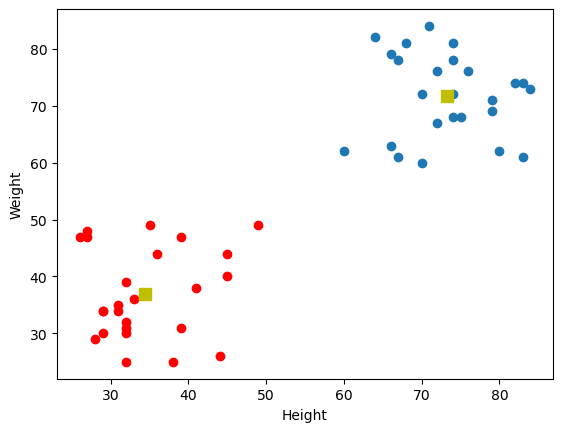

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
# convert to np.float32
Z = np.float32(Z)
# define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
# Plot the data
plt.scatter(A[:,0], A[:,1])
plt.scatter(B[:,0],B[:,1],c='r')
plt.scatter(center[:,0],center[:,1],s=80,c='y',marker='s')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

**Color Quantization** is the process of reducing number of colors in an image. One reason to do so is to reduce the memory. Here we use k-means clustering for color quantization

There are 3 features R,G,B. So we need to reshape the image to an array of Mx3 size (M is number of pixels in image). And after the clustering, we apply centroid values to all pixels

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('data/stop.jpg')
Z = img.reshape((-1,3))
Z = np.float32(Z)
# define criteria, number of cluster (K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret, label, center = cv.kmeans(Z,K,None,criteria,attempts=10,flags=cv.KMEANS_RANDOM_CENTERS)
#Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv.imshow('res2', res2)
cv.waitKey(0)
cv.destroyAllWindows()

### KNN

**OCR of Hand-written Digits**

In [41]:
import numpy as np
import cv2
img = cv2.imread('data/digits.png')
#gray scale conversion
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(type(gray_img))
print(gray_img.shape[:2])
# we will divide the image into 500 small dimensions of size 20x20
divisions = list(np.hsplit(i, 100) for i in np.vsplit(gray_img,50))
print(type(divisions))
print(np.size(divisions))
# convert into numpy array of size (50,100,20,20)
NP_array = np.array(divisions)
print(type(NP_array))
print(NP_array.shape[:2])
print(NP_array.shape[:4])
# preparing train_data and test_data. Size will be (2500, 20x20)
train_data = NP_array[:,:50].reshape(-1,400).astype(np.float32)
print(train_data.shape[:2])
print(train_data.shape[:4])
# size will be (2500, 20x20)
test_data = NP_array[:,50:100].reshape(-1,400).astype(np.float32)
# create 10 different labels for each type of digit
k = np.arange(10)
train_labels = np.repeat(k,250).reshape(-1, 1)
print(train_labels.ndim)
print(train_labels.shape[:2])
test_labels = np.repeat(k,250).reshape(-1, 1)
# Initiate kNN classifier
knn = cv2.ml.KNearest_create()
# perform training of data
knn.train(train_data, cv2.ml.ROW_SAMPLE, train_labels)
# obtain the output from the classifier by specifying the number of neighbors
ret, output, neighbours, distance = knn.findNearest(test_data, k=3)
# check the performace and accuracy of the classifier
matched = output==test_labels
correct_OP = np.count_nonzero(matched)
# calculate the accuracy
accuracy = (correct_OP*100.0)/(output.size)
# display accuracy
print(accuracy)

<class 'numpy.ndarray'>
(1000, 2000)
<class 'list'>
2000000
<class 'numpy.ndarray'>
(50, 100)
(50, 100, 20, 20)
(2500, 400)
(2500, 400)
2
(2500, 1)
91.64


**Import Letter Recognition dataset**

In [ ]:
from ucimlrepo import fetch_ucirepo
#fetch dataset
letter_recognition = fetch_ucirepo(id=59)
#pandas dataframes
X = letter_recognition.data.features
# Split the dataset in two, with 10000 samples each for training and test sets
train_data, test_data = np.vsplit(X, 2)
y = letter_recognition.data.targets
# metadata
print(letter_recognition.metadata)
# variable information
print(letter_recognition.variables)

In [7]:
import pandas as pd
import numpy as np

# 2. Vectorize the function
vectorized_char_to_ord = np.vectorize(lambda ch: ord(ch)-ord('A'))

# Create a NumPy array of characters
y_array = y.to_numpy()

# 3. Apply the vectorized function to the array
y_ordinal = vectorized_char_to_ord(y_array)
train_labels, test_labels = np.vsplit(y_ordinal, 2)


In [ ]:
import cv2 as cv
# initiate the KNN, classify, measure accuracy
knn = cv.ml.KNearest_create()
print(type(train_data))
print(train_data.shape[0:2])
print(type(train_labels))
print(train_labels.shape[0:2])
train_data_cv32f = np.array(train_data.to_numpy(), dtype=np.float32)
knn.train(train_data_cv32f, cv.ml.ROW_SAMPLE, train_labels)
test_data_cv32f = np.array(test_data.to_numpy(), dtype=np.float32)
ret, result, neighbours, dist = knn.findNearest(test_data_cv32f, k=5)
correct = np.count_nonzero(result == test_labels)
accuracy = correct*100.0/10000
print(accuracy)

### SIFT
Scale-Invariant Feature Transform can be used for object detection by detecting and matching keypoints between a reference object image and a target image

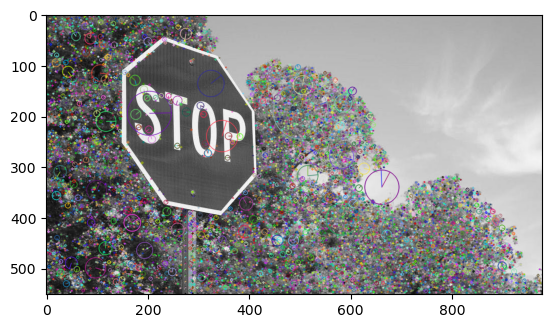

In [1]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('data/stop.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
# marking the keypoint on the image using circles
img = cv2.drawKeypoints(gray,
                       kp,
                       img,
                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)
plt.show()

### HOG
In KNN, we directly used pixel intensity as a feature vector. This time, we will use Histogram Of Oriented Grarident (HOG) as feature vectors

HOG is a feature descriptor used in computer vision for object detection, particulary effective for detecting shapes and outlines.

OpenCV provides built-in fuctionality to work with HOG, often combined with a Support Vector Machine (SVM) for classification

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
img = cv2.imread("data/people.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# winStride: The step size in pixels for moving the detection window
# padding: the padding added to the image borders before detection
# scale: the factor by which the detection window is scaled in each level of the image pyramid
(rects, weights) = hog.detectMultiScale(img_gray, winStride=(4,4), padding=(8, 8), scale=1.05)
for (x, y, w, h) in rects:
    cv2.rectangle(img_rgb, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
plt.imshow(img_rgb)
plt.show()

**Video**

In [3]:
import cv2
from matplotlib import pyplot as plt
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
# open the video file
video_path = "data/video_people.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video stream or error reading frame")
        break
    # Resize frame for faster processing
    frame = cv2.resize(frame, (640, 480))
    # Detect pedestrians in the frame
    # winStride: controls the step size in x and y directions for the sliding window
    # padding: adds padding to the image border
    # scale: controls the image pyramid scale factor
    boxes, weights = hog.detectMultiScale(frame, winStride=(8,8), padding=(32,32), scale=1.05)
    # drawing bounding boxes around detected pedestrians
    for (x, y, w, h) in boxes:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), thickness=2)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

### Haar Cascades
Haar Cascade classifiers are a machine learning-based method for object detection based on Haar features. They key idea is to detect objects in images at multiple scales using a cascade of classifilier

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("data/stop.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
plt.show()

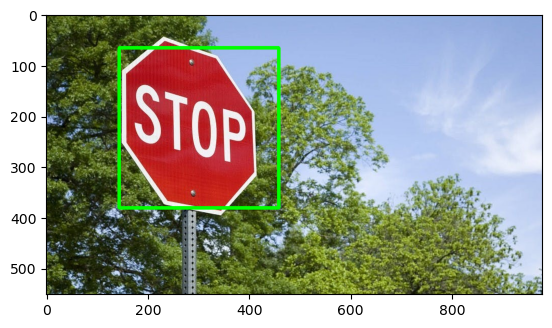

In [5]:
# Loading Haar Cascade Classifier
stop_cascade = cv2.CascadeClassifier('data/stop_data.xml')
# this function performs detection at multiple scales which helps detect
# objects of varying sizes in grayscale. It also defined the minimum size of the object
# to be detected
found = stop_cascade.detectMultiScale(img_gray, minSize=(20,20))
#drawing rectangles around detected objects
for (x,y,w,h) in found:
    cv2.rectangle(img_rgb, (x,y), (x+w, y+h), color=(0,255,0), thickness=5)
plt.imshow(img_rgb)
plt.show()